<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2022/blob/main/Assignment/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From linear ODE to State Space

Given an ODE:

$$a_{k}y^{(k)} +a_{k-1}y^{(k-1)}+...+a_{2}\ddot y+a_{1}\dot y + a_0 y= b_0$$

find its state space representation:

$$\dot x = Ax + b$$

## Process

The first step is to express higher derivatives

Step 1.1:

$$y^{(k)} + 
\frac{a_{k-1}}{a_{k}}y^{(k-1)}+
...+
\frac{a_{2}}{a_{k}}\ddot y+
\frac{a_{1}}{a_{k}}\dot y + 
\frac{a_{0}}{a_{k}} y = 
\frac{b_0}{a_{k}}$$

Step 1.2:

$$y^{(k)} = 
-\frac{a_{k-1}}{a_{k}}y^{(k-1)}-
...-
\frac{a_{2}}{a_{k}}\ddot y -
\frac{a_{1}}{a_{k}}\dot y - 
\frac{a_{0}}{a_{k}} y + 
\frac{b_0}{a_{k}}$$

Second step s introduction of new variables $x$:

Step 2.1:

$$x_k = y^{(k-1)} \\
  x_{k-1} = y^{(k-2)} \\
  ... \\
  x_1 = y$$

Step 2.2:
$$\dot x_1 = x_2 \\
\dot x_2 = x_3 \\
... \\
\dot x_k = 
-\frac{a_{k-1}}{a_{k}}x_k-
...-
\frac{a_{2}}{a_{k}} x_3 -
\frac{a_{1}}{a_{k}} x_2 - 
\frac{a_{0}}{a_{k}} x_1 + 
\frac{b_0}{a_{k}}$$

Finally, we write it in a matrix form.

# Tasks 1.1: ODE to State Space conversion

Convert to State Space represantation and to a transfer function representation

* $10 y^{(4)} -7  y^{(3)} + 2   \ddot y + 0.5 \dot y + 4y  = 15 u$
* $5  y^{(4)} -17 y^{(3)} - 3   \ddot y + 1.5 \dot y + 2y  = 25 u$
* $-3 y^{(4)} +22 y^{(3)} + 4   \ddot y + 1.5 \dot y + 1y  = 15 u$
* $5  y^{(4)} -17 y^{(3)} - 1.5 \ddot y + 100 \dot y + 1.1y= 45 u$
* $1.5y^{(4)} -23 y^{(3)} - 2.5 \ddot y + 0.1 \dot y + 100y= -10 u$

# Task 1.2 (higher difficulty)

Convert the following to a second order ODE and to a transfer function representation:

$$\dot x = 
\begin{pmatrix} 1 & 0 \\ -5 & -10
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$
$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 1 & 3
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$
$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 6 & 0
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$
$$\dot x = 
\begin{pmatrix} 0 & 1 \\ 6 & 3
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$

For all of the above, $$y = \begin{pmatrix} 1 & 0 \end{pmatrix} x$$ 


# Solve ODE

Below is an example of how one can solve and ODE in Python

In [ ]:
import numpy as np
from scipy.integrate import odeint

n = 4
A = np.array([[0, 1, 0], [0, 0, 1], [-10, -5, -2]])

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)# + B*np.sin(t)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n-1)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}

import matplotlib.pyplot as plt

plt.subplot(121)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

## Task 1.3 Implement Euler Integration or Runge-Kutta Integration scheme, solve the equation from the Task 1 using it.

# Task 2.1, convert to state space and simulate

* $10 y^{(5)} + 10 y^{(4)} -7  y^{(3)} + 2   \ddot y + 0.5 \dot y + 4y  = 0$
* $1 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 3   \ddot y + 1.5 \dot y + 2y  = 0$
* $6 y^{(5)} -3 y^{(4)}  +22 y^{(3)} + 4   \ddot y + 1.5 \dot y + 1y  = 0$
* $22 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 1.5 \ddot y + 100 \dot y + 1.1y= 0$
* $-10 y^{(5)} + 1.5y^{(4)} -23 y^{(3)} - 2.5 \ddot y + 0.1 \dot y + 100y= 0$

# Task 2.2, convert to state space and simulate
* $10 y^{(5)} + 10 y^{(4)} -7  y^{(3)} + 2   \ddot y + 0.5 \dot y + 4y  = \sin(t)$
* $1 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 3   \ddot y + 1.5 \dot y + 2y  = \sin(t)$
* $6 y^{(5)} -3 y^{(4)}  +22 y^{(3)} + 4   \ddot y + 1.5 \dot y + 1y  = \sin(t)$
* $22 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 1.5 \ddot y + 100 \dot y + 1.1y= \sin(t)$
* $-10 y^{(5)} + 1.5y^{(4)} -23 y^{(3)} - 2.5 \ddot y + 0.1 \dot y + 100y= \sin(t)$

## Subtask 2.3 Mass-spring-damper system

Find or derive equations for a mass-spring-damper system with mass 10kg, spring stiffness of 1000 N / m and damping coefficient 1 N s / m, write them in state-space and second order ODE forms, and simulate them.

# Task 3.1, Convert to transfer functions

* 
$
\begin{cases}
\ddot x + 0.5 \dot x + 4y = u \\
y = 1.5 \dot x + 6 x
\end{cases}
$

* 
$
\begin{cases}
10 \ddot x + 1.5 \dot x + 8y = 0.5u \\
y = 15 \dot x + 16 x
\end{cases}
$

* 
$
\begin{cases}
\ddot x + 2 \dot x - 5y = u \\
y = 2.5 \dot x - 7 x
\end{cases}
$

* 
$
\begin{cases}
\ddot x + 22 \dot x + 10y = 10u \\
y = 10.5 \dot x + 11 x
\end{cases}
$


# 4. Stability of an autonomous linear system

Autonomous linear system is *stable*, iff the eigenvalues of its matrix have negative real parts. In other words, their should lie on the left half of the complex plane.

Consider the system:

$$\dot x = 
\begin{pmatrix} -1 & 0.4 \\ -20 & -16
\end{pmatrix}
x
$$

Let us find its eigenvalues:

In [ ]:
import numpy as np
from numpy.linalg import eig

A = np.array([[-1, 0.4], [-20, -16]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [ -1.55377801 -15.44622199]


The eigenvalues are $\lambda_1 = -1.55$ and $\lambda_1 = -15.44$, both real and negative. Let us test those and show that the system's state converges:

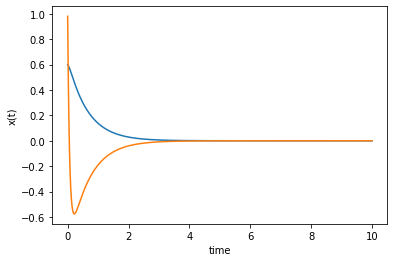

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def LTI(x, t):
    return A.dot(x)

time = np.linspace(0, 10, 1000)    # interval from 0 to 10
x0 = np.random.rand(2)            # initial state

solution = odeint(LTI, x0, time)

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

## Task 4.1. Find if the following autonomous linear systems are stable

$$\dot x = 
\begin{pmatrix} 1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$
$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 1 & 3
\end{pmatrix}
x
$$
$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 6 & 0
\end{pmatrix}
x
$$
$$\dot x = 
\begin{pmatrix} 0 & 1 \\ 6 & 3
\end{pmatrix}
x
$$

## Task 4.2 Simulate all of them, to show convergence.
## Task 4.3 Add a constant term to the equation and show via simulation how the point where the system converges changes (two examples are sufficient).